# Lab 5: Paleoclimate Data

In this lab you will analyze several famous paleoclimate datasets, and explore their implications for how climate changes.

## 1. Glacial-Interglacial cycles

Much information about Earth's climate comes from the "2 mile time machines": long cores retrieved from polar ice caps. The EPICA (European Project for Ice Coring) Dome C ice core is one such time machine: it is a cylinder of ice collected by drilling through 3270m of the Antarctic ice sheet, down to 5 meters above bedrock. The core shows annual layers, which can be used to date the air bubbles trapped in the ice. These bubbles are a veritable time capsule, giving us windows into the atmospheric composition hundreds of thousands of years ago. Analysis of the gas content of the bubbles gives the concentration of carbon dioxide in the atmosphere when the ice formed. Ratios of hydrogen isotopes are a proxy for air temperature above the ice sheet at the time the ice was formed. 

As usual, let's start by invoking a few useful Python packages:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us load the reconstructed temperature and $CO_2$ over the last 800,000 years, then plot them.

In [2]:
f1 = pd.read_csv('edc3deuttemp2007.txt',delim_whitespace=True,skiprows=91)

In [3]:
f1

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
5,6,2.75,-17.73776,NaN,NaN
6,7,3.30,-10.95945,NaN,NaN
7,8,3.85,-3.20879,NaN,NaN
8,9,4.40,5.48176,NaN,NaN
9,10,4.95,13.52038,NaN,NaN


Load the reconstructed carbon dioxide concentration in the last 800,000 years.

In [3]:
f2 = pd.read_csv('edc-co2-2008.txt',delim_whitespace=True,skiprows=773)

In [5]:
f2

,Age(yrBP),CO2(ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
5,485,277.7
6,559,281.1
7,672,282.2
8,754,280.1
9,877,278.4


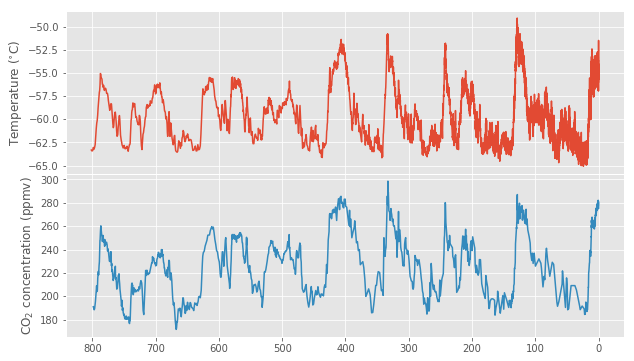

In [74]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(f1['Age']/1000,f1['Temperature']-54.5)
# Make the y-axis label, ticks and tick labels match the line color.
ax[0].set_ylabel(r'Temperature ($^{\circ}$C)')
#ax1.tick_params('y')
plt.gca().invert_xaxis()

ax[1].plot(f2['Age(yrBP)']/1000,f2['CO2(ppmv)'],color='C1')
ax[1].set_ylabel(r'CO$_2$ concentration (ppmv)')
ax[0].set_xlabel('1000 years before present')
fig.subplots_adjust(hspace=0)

In [4]:
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import gridplot
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [5]:
p1 = figure(title='Temperature anomaly',width=800, height=300,x_range=(800, 0))
p1.xaxis.axis_label = '1000 years before present'
p1.yaxis.axis_label = 'Temperature anomaly'
p1.line(f1['Age']/1000,f1['Temperature'],color='red')

p2 = figure(title='CO2',width=800, height=300,x_range=(800, 0))
p2.xaxis.axis_label = '1000 years before present'
p2.yaxis.axis_label = 'CO2 concentration (ppmv)'
p2.line(f2['Age(yrBP)']/1000,f2['CO2(ppmv)'])
show(gridplot([[p1], [p2]]))

**Question 1**: What is the change in global air temperature between glacial and interglacial periods? 

**Answer 1**:

**Question 2**: When did interglacial periods occur? What is their average tempo (aka cyclicity)?

**Answer 2**:

**Question 3**: Let us define interglacials as periods when the temperature difference was at or
above 0, on average. Using this definition, when did the present interglacial
begin? Has any other interglacial lasted as long in the past 800,000y? If so, when?

**Answer 3**:

**Question 4**: How does CO$_2$ concentration change during glacial/interglacials? Propose a feedback by which changing carbon dioxide concentration can amplify the orbitally-induced warming/cooling during glacial/interglacials. (think of the “Carbon cycle” lecture)

**Answer 4**:

**Question 5**: Let’s look at this quantitatively. Knowing that the LGM surface ocean cooling was approximately 4$^{\circ}$C globally, and assuming that each 1$^{\circ}$C cooling translates to an ~8ppm CO$_2$ drawdown, can this mechanism account for the observed glacial-interglacial variations in atmospheric CO2 concentration? If not, what other mechanism needs to be invoked?

**Answer 5**:

It is plain the to the eye that temperature and CO$_2$ concentration are strongly correlated. Now let's quantify this:

Since the temperature and CO$_2$ records are not atn the same time resolution, we need to interpolate them to the same age series to calculate correlations.

In [79]:
# interpolate co2 and temperature records to the same age to do correlation
# NOTE: Pandas has built-in tools for that 
from scipy.interpolate import interp1d

f_t = interp1d(f1['Age']/1000,f1['Temperature']-54.5,bounds_error=False)
f_co2 = interp1d(f2['Age(yrBP)']/1000,f2['CO2(ppmv)'],bounds_error=False)

# age step: 0.1kyr = 100yr
age = np.arange(0,800,0.1)

temp_interp = f_t(age)
co2_interp = f_co2(age)

We can first plot the scatterplot to see the relationship between temperature and CO$_2$ concentration.

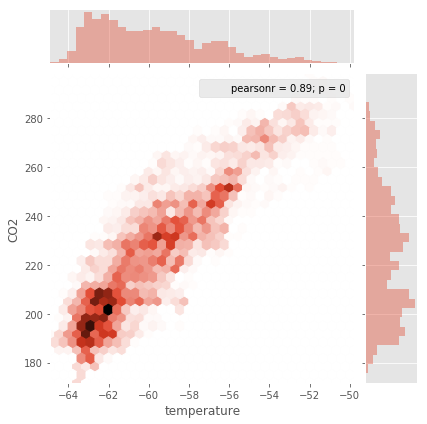

In [84]:
# combine temperature and co2 to a dataframe first
d = {'temperature': temp_interp, 'CO2': co2_interp, 'age': age}
df = pd.DataFrame(data=d)
# plot scatterplot
sns.jointplot(x="temperature", y="CO2", data=df, kind = "hex")

Now calculate the correlation.

In [127]:
#lag-0 correlation
df['temperature'].corr(df['co2'])

0.8884517012490313

You all know that correlation is not causation. However, in cases where one variable (A) causes changes in another (B), one often sees A lead the changes in B. Let us hunt for leads in the relationship between temeperature and $CO_2$. We do this via lag-correlations, which are simply correlations between A and lagged copies of B.

In [131]:
# lag correlations (co2 leads 10 kyrs to lags 10 kyrs)

lags = np.arange(50,-51,-1)
lag_corr = np.zeros(len(lags))

for i in np.arange(len(lags)):
    lag_corr[i] = df['temperature'].corr(df['co2'].shift(lags[i]))

Text(0,0.5,'correlation')

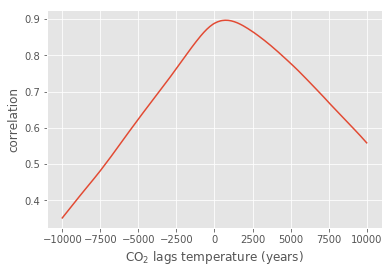

In [140]:
plt.plot(lags*100,lag_corr)
plt.xlabel(r'CO$_2$ lags temperature (years)')
plt.ylabel('correlation')

Note: The positive x values means CO$_2$ lags temperature, and the negative x values means CO$_2$ leads temperature.

**Question 6a**: At which point does the correlation reach a maximum? What does that mean? On these timescales, is $CO_2$ a forcing or a feedback in climate change? 

**Answer 6a**:

We can also graphically estimate the lag between $CO_2$ and temperature, using this zoomed out figure:

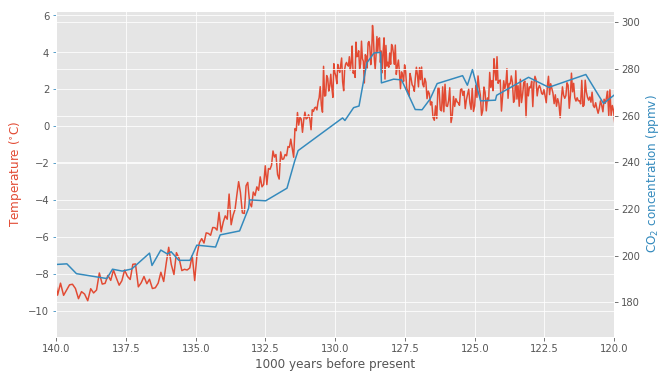

In [78]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(f1['Age']/1000,f1['Temperature'],color='C0')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('1000 years before present')
ax1.set_ylabel(r'Temperature ($^{\circ}$C)',color='C0')
# zoom in 120kyr - 140 kyrs
ax1.set_xlim(120,140)
ax1.tick_params('y',color='C0')

ax2 = ax1.twinx()
ax2.plot(f2['Age(yrBP)']/1000,f2['CO2(ppmv)'],color='C1')
ax2.set_ylabel(r'CO$_2$ concentration (ppmv)',color='C1')
ax2.set_xlabel('1000 years before present')
ax1.tick_params('y',color='C1')
#revert the x-axis
plt.gca().invert_xaxis()

 **Question 6b**: Does this agree with what you obtained in 6a?

 **Answer 6b**:

## 2. Climate of the Common Era

The Common Era refers to the past 2,000 years of Earth's history. As we will see in class, one can use data from all manner of sources (tree rings corals, icea cores, lake and marine sediments, etc) to piece together some estimate of global or hemispheric temperature over this interval. This allows us to answer an important question: **Do we live in extraordinary times?**.
Specifically, are current temperature levels unprecedented in the past 2,000 years? Is the rate of warming unpredecented?
To do this, we use the work of *Hakim et al. [2016]*, who reconstructed Northern Hemisphere 2m air temperature at yearly resolution. 
Details here: https://www.researchgate.net/project/Last-Millennium-Reanalysis

In [16]:
ddict = pd.read_pickle('hakim_lmr_jgra_2016_figure_2.pckl')

In [17]:
years = ddict['recon_times']
lmr_nht = ddict['sanhmt']
lmc = ddict['lmc']
nhmt_max = ddict['nhmt_max']
nhmt_min = ddict['nhmt_min']
xvar = ddict['xvar']
lmr_trend = ddict['lmr_trend']
offset = ddict['offset']
allyears = ddict['allyears']
ipcc_mean = ddict['ipcc_mean']
ipcc_max = ddict['ipcc_max']
ipcc_min = ddict['ipcc_min']

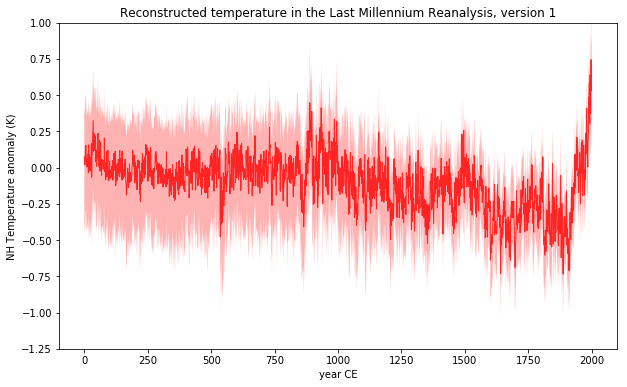

In [18]:
plt.figure(figsize=(10,6))
plt.plot(years,lmr_nht,'r-',linewidth=1,label='LMR mean',alpha=0.8)
plt.fill_between(years, nhmt_max, nhmt_min, facecolor='red', alpha=0.3, linewidth=0)
plt.title('Reconstructed temperature in the Last Millennium Reanalysis, version 1')
plt.ylim([-1.25,1])
plt.xlabel('year CE')
plt.ylabel('NH Temperature anomaly (K)')
plt.savefig('hakim_lmr_jgra_2016_figure_2.pdf', dpi=300, format='pdf', bbox_inches='tight')

The code below chops the reconstruction in blocks of length "segment_length" and steps them every "step" steps, to find the mean and trend over each interval.

In [19]:
def means_and_slopes(variable,segment_length,step,years):
    # This function calculates the means and slopes for the specified segments.  Outputs:
    #    segment_means:      Means of every segment.
    #    segment_slopes:     Slopes of every segment.
    #    segment_intercepts: Y-intercepts of every segment, for plotting purposes.
    #    segment_idxs:       The first and last index of every segment, for record-keeping.
    #
    import statsmodels.api as sm
    import numpy as np
    n_years = variable.shape[0]
    n_segments = int(((n_years-segment_length)/step)+1)
    skip_idx = np.remainder(n_years-segment_length,step)  # If the segments don't cover the entire time-span, skip years at the beginning.
    #
    # Initialize variables
    segment_means      = np.zeros((n_segments))
    segment_slopes     = np.zeros((n_segments))
    segment_intercepts = np.zeros((n_segments))
    segment_idxs       = np.zeros((n_segments,2),dtype=int)
    segment_means[:]      = np.nan
    segment_slopes[:]     = np.nan
    segment_intercepts[:] = np.nan
    segment_idxs[:]       = np.nan
    #
    # Compute the means and slopes for every location
    for k in range(n_segments):
        start_idx = skip_idx+(k*step)
        end_idx   = start_idx+segment_length
        #print("Calculating: "+str(k+1)+"/"+str(n_segments)+", years: "+str(years[start_idx])+"-"+str(years[end_idx-1]))
        segment_means[k] = np.mean(variable[start_idx:end_idx],axis=0)
        segment_slopes[k], segment_intercepts[k] = np.polyfit(np.arange(start_idx,end_idx),variable[start_idx:end_idx],1)
        segment_idxs[k,:] = start_idx,end_idx-1
    #
    return segment_means, segment_slopes, segment_intercepts, segment_idxs


In [20]:
step = 10; segment_length = 100
segment_means, segment_slopes, segment_intercepts, segment_idxs = means_and_slopes(lmr_nht,segment_length,step,years)

Let's plot the reconstruction and the fitted trend lines.

Text(0,0.5,'Temperature anomaly (K)')

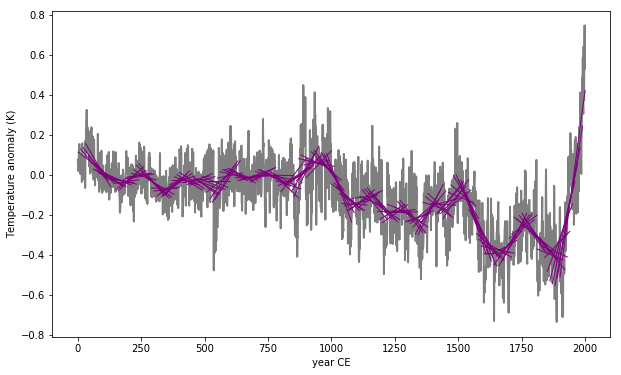

In [21]:
plt.figure(figsize=(10,6))
plt.plot(years,lmr_nht,'k-',linewidth=2,label='LMR '+lmc,alpha=.5)
for i in range(len(segment_idxs)):
    slope_all_idxs = np.arange(segment_idxs[i,0],segment_idxs[i,1]+1)
    slope_segment_years = years[slope_all_idxs]
    slope_segment_values = (slope_all_idxs*segment_slopes[i])+segment_intercepts[i]
    line3, = plt.plot(slope_segment_years,slope_segment_values,color='Purple',linewidth=1)
plt.xlabel('year CE')
plt.ylabel('Temperature anomaly (K)')

Now we wish to see if the latest trend is unprecented. 

Text(0,0.5,'Probability Density')

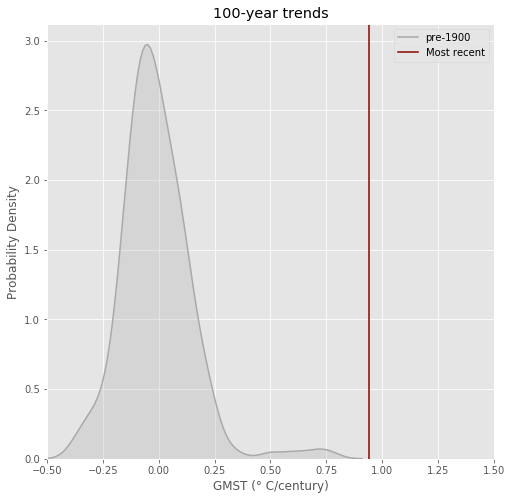

In [32]:
plt.figure(figsize=(8,8))
ngrid = 100
gmt_blockTrend_older = segment_length*segment_slopes[0:-1].flatten()
gmt_blockTrend_newest = segment_length*segment_slopes[-1]
cutoff_date = str(years[-1]-segment_length) # extract date string for cutoff
old_kws = {"color": 'DarkGray', "label": "pre-"+cutoff_date,"shade": True,"gridsize": ngrid,"legend":False}
sns.distplot(gmt_blockTrend_older, hist=False, kde_kws= old_kws, color = 'DarkGray')
plt.axvline(gmt_blockTrend_newest, color = 'DarkRed',label='Most recent')
plt.title(str(segment_length)+"-year trends")
plt.xlim(-.5,1.5)
plt.legend(loc='upper right')
    
plt.xlabel(u'GMST (\xb0 C/century)');  plt.ylabel("Probability Density")
#fig.savefig('HowUnusualIsCurrentTrend.pdf',dpi=300, bbox_inches='tight',pad_inches=.3)


**Question 7**: Does this suggest that the most recent temperature trend is unprecented? Why?

**Answer 7**:

It turns out that there are many estimates of NHT over the past 1,000 to 2,000 years -- these estimates vary in the input data and statistical methods used.

Now let's redo this analysis with other reconstructions as in northern hemisphere 1881-1980

In [22]:
nh_dict = pd.read_pickle('NH1881-1980.pickle')

In [23]:
nh_dict

{'CL12loc': {'temp': array([-0.32,  0.08, -0.09, ...,  0.09,  0.04,  0.17]),
  'year': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.971e+03, 1.972e+03,
         1.973e+03])},
 'CRUTEM4NH': {'temp': array([-0.376, -0.03 , -0.133, -0.253,  0.094, -0.372, -0.445, -0.323,
         -0.21 ,  0.21 , -0.508, -0.193, -0.571,  0.33 , -0.575, -0.117,
         -0.012, -0.403, -0.037, -0.022, -0.243, -0.446,  0.003, -0.163,
         -0.039, -0.783, -0.291, -0.052,  0.362, -0.252, -0.204, -0.273,
         -0.083, -0.395, -0.518, -0.495, -0.308, -0.293, -0.483, -0.092,
         -0.114, -0.281, -0.369, -0.478, -0.079, -0.325, -0.156, -0.065,
         -0.096, -0.045,  0.061,  0.067, -0.27 , -0.182, -0.31 , -0.177,
          0.037, -0.476, -0.262, -0.233, -0.095, -0.174, -0.402, -0.142,
          0.058,  0.026, -0.202, -0.534, -0.219, -0.214, -0.046,  0.23 ,
         -0.051,  0.019, -0.064,  0.131,  0.172,  0.017,  0.06 , -0.284,
          0.192,  0.239,  0.17 , -0.165,  0.324,  0.113,  0.141,  0.273,

Here we list the name of different reconstructions. Each name represent one temperature recontruction of the northern hemisphere in 1881-1980.

In [35]:
nh_dict.keys()

dict_keys(['PS04bore', 'Ma08cpsl', 'Ma08eivl', 'LO12glac', 'Sh13pcar', 'LM08ave', 'Fr07treecps', 'He07tls', 'Da06treecps', 'Mo05wave', 'Ju07cvm', 'Ma09regem', 'Ma08min7eivf', 'CL12loc', 'Lj10cps', 'HadCRUT4NH', 'CRUTEM4NH', 'CRUTEM4_30to90N'])

Now try to reuse the previous code to redo the analysis with one recontruction.

In [24]:
colors = plt.cm.tab20_r(np.linspace(0, 1, len(nh_dict)))

Text(0,0.5,'NH Temperature anomaly (K)')

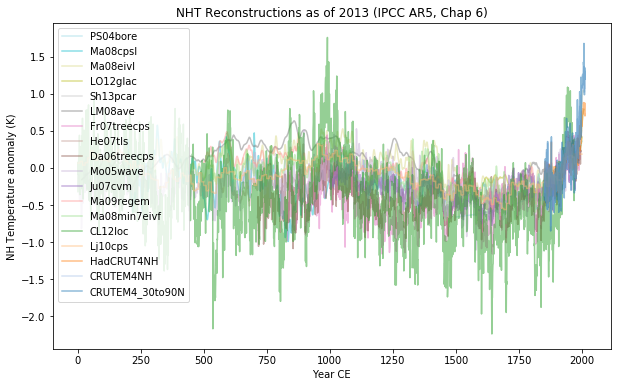

In [6]:
plt.figure(figsize=(10,6))
for key, col in zip(nh_dict, colors):
    plt.plot(nh_dict[key]['year'],nh_dict[key]['temp'],label=str(key),color=col,alpha=.5)
    
plt.legend()   
plt.title("NHT Reconstructions as of 2013 (IPCC AR5, Chap 6)")
plt.xlabel('Year CE')
plt.ylabel('NH Temperature anomaly (K)')

**Question 8**: Let's compare our previous result with one using one of these curves. Pick your favorite and apply the same analysis as before.

In [25]:
nht = nh_dict['Ju07cvm']['temp']
years = nh_dict['Ju07cvm']['year']
segment_means, segment_slopes, segment_intercepts, segment_idxs = means_and_slopes(nht,segment_length,step,years)

Text(0,0.5,'Temperature anomaly (K)')

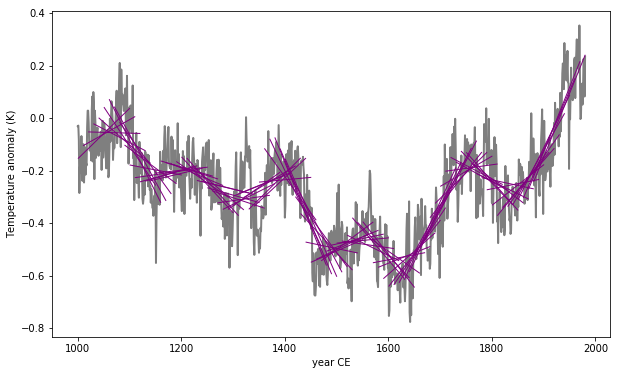

In [26]:
plt.figure(figsize=(10,6))
plt.plot(years,nht,'k-',linewidth=2,label='LMR '+lmc,alpha=.5)
for i in range(len(segment_idxs)):
    slope_all_idxs = np.arange(segment_idxs[i,0],segment_idxs[i,1]+1)
    slope_segment_years = years[slope_all_idxs]
    slope_segment_values = (slope_all_idxs*segment_slopes[i])+segment_intercepts[i]
    line, = plt.plot(slope_segment_years,slope_segment_values,color='Purple',linewidth=1)
plt.xlabel('year CE')
plt.ylabel('Temperature anomaly (K)')

Text(0,0.5,'Probability Density')

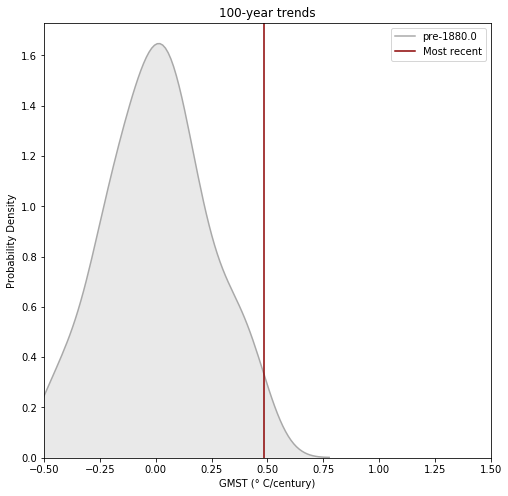

In [27]:
plt.figure(figsize=(8,8))
ngrid = 100
gmt_blockTrend_older = segment_length*segment_slopes[0:-1].flatten()
gmt_blockTrend_newest = segment_length*segment_slopes[-1]
cutoff_date = str(years[-1]-segment_length) # extract date string for cutoff
old_kws = {"color": 'DarkGray', "label": "pre-"+cutoff_date,"shade": True,"gridsize": ngrid,"legend":False}
sns.distplot(gmt_blockTrend_older, hist=False, kde_kws= old_kws, color = 'DarkGray')
plt.axvline(gmt_blockTrend_newest, color = 'DarkRed',label='Most recent')
plt.title(str(segment_length)+"-year trends")
plt.xlim(-.5,1.5)
plt.legend(loc='upper right')
    
plt.xlabel(u'GMST (\xb0 C/century)');  plt.ylabel("Probability Density")

**Question 9**: Does this agree with the result of question 7? Why or why not?

**Answer 9**:

**Question 10**: Does this agree with your lab mates' analyses? Why or why not?

**Answer 10**:

(to properly answer questions 8-10, one would need to use a probabilistic ensemble. This is a bit above your pay grade, so we'll keep it simple for now). 